# Exploring Bangladesh 🌏

Located in South Asia, bordered by India to the north, east, and west, and Myanmar to the southeast and has a total area of 147,570 square kilometers, the eighth most populous country in the world and a population of around 170 million.

## Contents:
- Hansen Forest Cover Change 2014 - 2019 & Intact Forest Landscapes
- Geocarbon Above Ground Biomass
- Soil Organic Carbon Density (kg/cm @1m Depth)
- Soil Organic Carbon

## About:

Bangladesh has a diverse range of ecosystems, including tropical forests and wetlands.

- One of the most important ecosystems in Bangladesh is the Sundarbans mangrove forest, which is home to a range of endangered species. The forest also provides important ecosystem services, such as carbon sequestration and storm protection for coastal communities.

- The freshwater swamp forests in Bangladesh are important ecosystems that provide a range of ecological and economic benefits. These forests are found in the low-lying areas of the country, particularly in the northeastern region, and are characterized by their unique vegetation and waterlogged soils.

In [1]:
import geojson
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import matplotlib as mplb
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import requests, io
from IPython.display import display, Markdown

import rasterio as rst
from rasterio.plot import show,show_hist
from rasterio.mask import mask


%matplotlib inline
import os

In [2]:
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
plt.rcParams.update({'figure.max_open_warning': 0})

# earth engine visualizations
import ee
import geemap

In [3]:
def getdf(input):
  file = input
  return gpd.read_file(file)

In [4]:
bangladesh = r'C:\Users\maazi\Desktop\Outreachy 2023 mojaglobal\BGD_AL2_Bangladesh.json'
bangladesh = getdf(bangladesh)

In [5]:
terrestrial_ecoregion = r'C:\Users\maazi\Desktop\Outreachy 2023 mojaglobal\TerrestrialEcoregionsoftheWorld_WWF.geojson'
terrestrial_ecoregion = getdf(terrestrial_ecoregion)

## Bangladesh's Freshwater Swamp Forest & Sundarbans Mangroves

In [6]:
forest_freshwater_swamp = terrestrial_ecoregion[terrestrial_ecoregion['ECO_NAME'] == 'Sundarbans freshwater swamp forests']
forest_sundarbans_mangroves = terrestrial_ecoregion[terrestrial_ecoregion['ECO_NAME'] == 'Sundarbans mangroves']

In [ ]:
forest_freshwater_swamp = forest_freshwater_swamp.clip(bangladesh)
forest_sundarbans_mangroves = forest_sundarbans_mangroves.clip(bangladesh)

In [10]:
ban_forest = pd.concat([forest_freshwater_swamp, forest_sundarbans_mangroves])

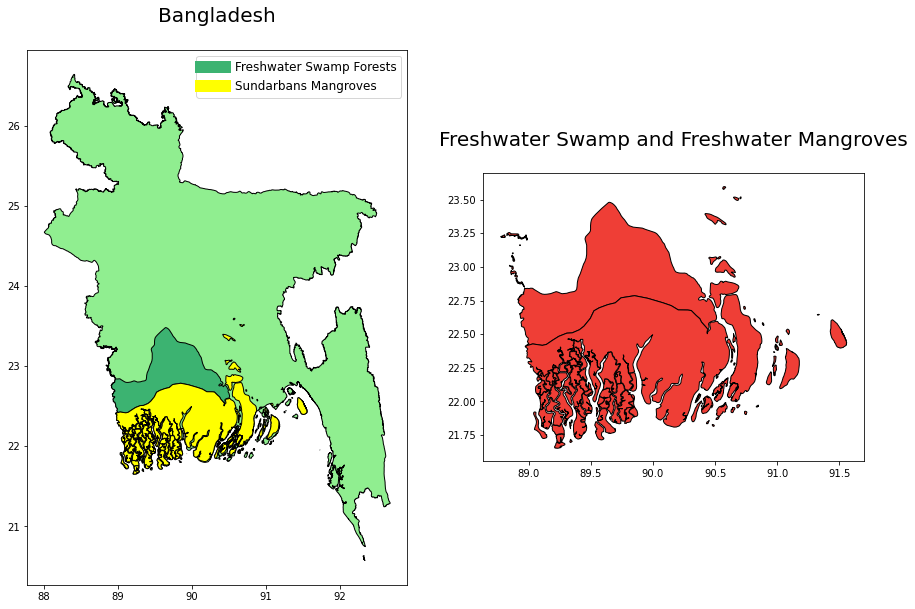

In [11]:
from matplotlib.lines import Line2D

# Plotting in the maps
fig, axes = plt.subplots(1,2, figsize=(15,15))

# first map axes[0]
axes[0].set_title('Bangladesh\n', fontsize=20)
bangladesh.plot(ax=axes[0], color='lightgreen', edgecolor='black')
forest_freshwater_swamp.plot(ax=axes[0], color="mediumseagreen", edgecolor="black")
forest_sundarbans_mangroves.plot(ax=axes[0], color="yellow", edgecolor="black")
legend_elements = [Line2D([0], [0], color='mediumseagreen', lw=12, label='Freshwater Swamp Forests'),
                   Line2D([0], [0], color='yellow', lw=12, label='Sundarbans Mangroves')]
axes[0].legend(handles=legend_elements, fontsize=12)

# third map axes[1]
axes[1].set_title('Freshwater Swamp and Freshwater Mangroves\n', fontsize=20)
ban_forest.plot(ax=axes[1], color='#EF3E36', edgecolor='black')

plt.show()

In [12]:
import json
import pandas as pd

with open('forest_zone.geojson') as fo:
    data_str = fo.read()
data = json.loads(data_str) 
df = pd.DataFrame(data)

In [13]:
gdf = gpd.GeoDataFrame.from_features(df['features'])

In [ ]:
forest_zone = gdf.clip(bangladesh)

In [15]:
forest_zone

,geometry,FID,REGION
9,"MULTIPOLYGON (((89.45330 22.38192, 89.45030 22...",9,10


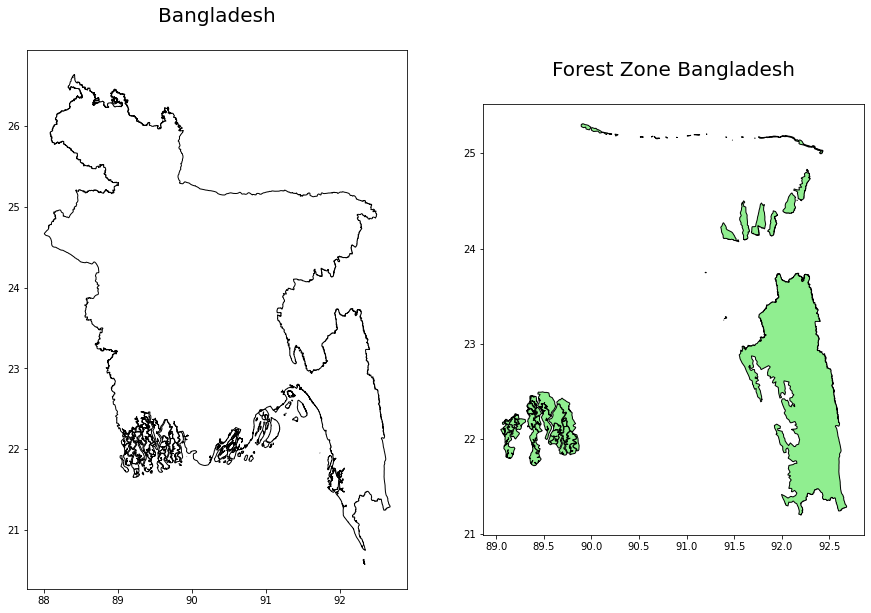

In [16]:
from matplotlib.lines import Line2D

# Plotting in the maps
fig, axes = plt.subplots(1,2, figsize=(15,15))

# first map axes[0]
axes[0].set_title('Bangladesh\n', fontsize=20)
bangladesh.plot(ax=axes[0], color='none', edgecolor='black')

# third map axes[1]
axes[1].set_title('Forest Zone Bangladesh\n', fontsize=20)
forest_zone.plot(ax=axes[1], color='lightgreen', edgecolor='black')

plt.show()

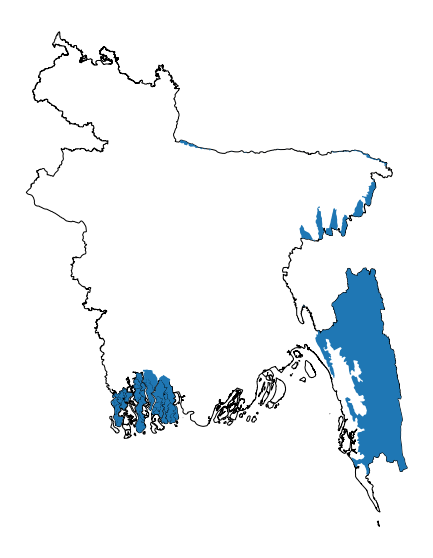

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10));


# plot the base map of Bangladesh
bangladesh.plot(ax=ax, color='none', edgecolor='black')

# plot the forest zone on top of the base map
forest_zone.plot(ax=ax, legend=True)

plt.axis('off')
plt.show()

## Observations: 
Majority of Forest Cover in Bangladesh can be spotted in the South Western region around Kanchin Rainforest and in the Moist Decidious Forests around it in the same area, a good amount of forest cover can also be spotted in the Southernmost part, i.e. in Sundarban Mangroves.

- It's the Subtropical Moist Forests and Subtropical Wet Forest zones where more than 95% of the forest cover of the country are found.
- The climate shifts in these region have been constant and are projected to be constant as well as determined by the analysis.
- These region received realtively higher annual precipitation and have are rich in soil nutrients.

## Hansen Global Forest Change 
- (Earth Engine needs to be set-up and initialized in order to run this)
- Forest Change images can be found in the folder name "forestcover_images"

In [ ]:
ee.Authenticate()
ee.Initialize()

In [39]:
ban_region = ee.Geometry.Rectangle(90.0, 20.0, 93.0, 27.0)

# Loading dataset - studying roi and yoi.
hansen = ee.Image('UMD/hansen/global_forest_change_2019_v1_7').select('treecover2000', 'loss', 'gain', 'lossyear').clip(ban_region)
hansen2014 = hansen.updateMask(hansen.select('lossyear').gte(14))
hansen2019 = hansen.updateMask(hansen.select('lossyear').gte(19))
""
# Calculating forest cover in 2014 and 2019
forest2014 = hansen2014.select('treecover2000').divide(100)
forest2019 = hansen2019.select('treecover2000').divide(100)

# Calculating forest loss and gain
loss = hansen2014.select('loss')
gain = hansen2019.select('gain')

# Define the visualization parameters for the forest cover maps
forest_vis = {
    'min': 0,
    'max': 1,
    'palette': ['000000', '00FF00']
}

# Define the visualization parameters for the loss and gain maps
loss_gain_vis = {
    'min': 0,
    'max': 1,
    'palette': ['FF0000', '00FF00']
}

# Creating a map and add the forest cover maps, loss map, and gain map
Map = geemap.Map()
Map.centerObject(ban_region, 7)
Map.addLayer(forest2014, forest_vis, 'Forest cover 2014')
Map.addLayer(forest2019, forest_vis, 'Forest cover 2019')
Map.addLayer(loss, loss_gain_vis, 'Forest loss')
Map.addLayer(gain, loss_gain_vis, 'Forest gain')
Map.add_legend(title='Forest Cover Legend', legend_dict={'Forest': '00FF00'})
Map.add_legend(title='Forest Loss/Gain Legend', legend_dict={'Forest loss': 'FF0000', 'Forest gain': '00FF00'})

In [ ]:
Map.addLayerControl()
Map

**There's a drastic change in the Forest Cover 2019 when compared to 2014, high forest land has been lost and the gain has been pretty minimal.**

-------------------------------

### Geocarbon Above Ground Biomass

In [7]:
#implementing to better determine the areas of interest
import seaborn as sns
sns.set()

In [25]:
geocarbon_rst = r'GEOCARBON_AGB_Map180.tif'
geocarbon_img = rst.open(geocarbon_rst)

In [26]:
out_geocarbon, out_transform = mask(geocarbon_img, [geom for geom in bangladesh.geometry], crop=True, pad=True)
out_meta = geocarbon_img.meta

out_meta.update({"driver": "GTiff",
                 "height": out_geocarbon.shape[1],
                 "width": out_geocarbon.shape[2],
                 "transform": out_transform})

with rst.open(r'geocarbon_masked.tiff', 'w', **out_meta) as dest:
    dest.write(out_geocarbon)

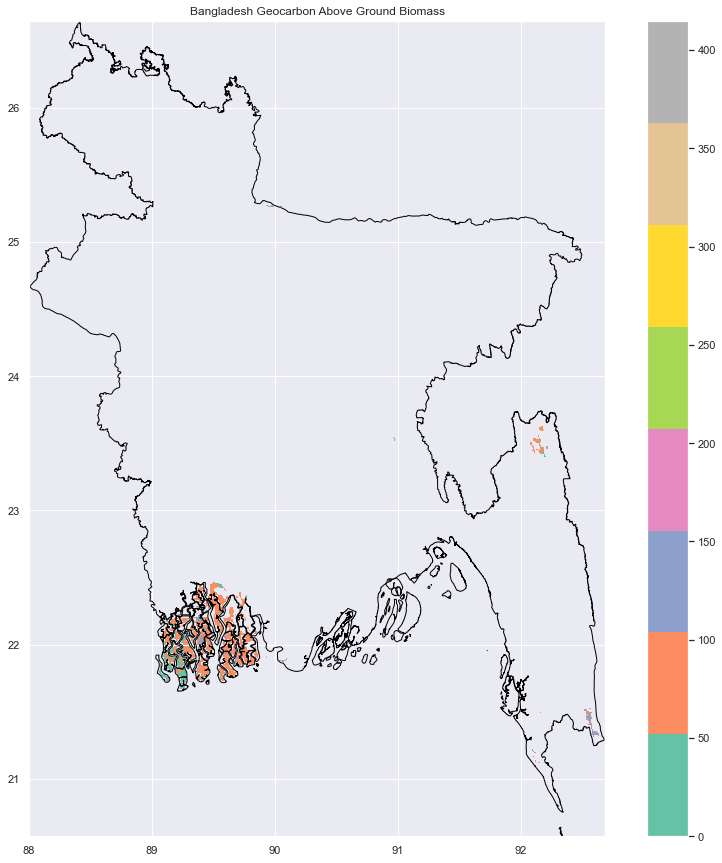

In [63]:
ban_geocarbon_rst = r'geocarbon_masked.tiff'
ban_geocarbon_img = rst.open(ban_geocarbon_rst)
mplb.rc('image', cmap='Set2')

arr = ban_geocarbon_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.set_title('Bangladesh Geocarbon Above Ground Biomass')
show(arr, transform=ban_geocarbon_img.transform, ax=ax)
bangladesh.plot(ax=ax, color='none', edgecolor='black')

fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)

plt.show()

## Observation: 
- Here, the amount of Geocarbon Aboveground Biomass is null across the country, apart from the Sundarban Mangroves, and a very few areas ~5% of the Kanchin Rainforest.
- In Bangladesh, GC AGB can be well found in the western areas of Sundarban Mangroves and ranges between 0-100.

### Soil Organic Carbon

In [41]:
gsoc_rst = r'GlocalSoilOC_GSOCmap1.5.0.tif'
gsoc_img = rst.open(gsoc_rst)

In [42]:
out_gsoc, out_transform = mask(gsoc_img, [geom for geom in bangladesh.geometry], crop=True, pad=True)
out_meta = gsoc_img.meta

out_meta.update({"driver": "GTiff",
                 "height": out_gsoc.shape[1],
                 "width": out_gsoc.shape[2],
                 "transform": out_transform})

with rst.open(r'gsoc_masked.tiff', 'w', **out_meta) as dest:
    dest.write(out_gsoc)

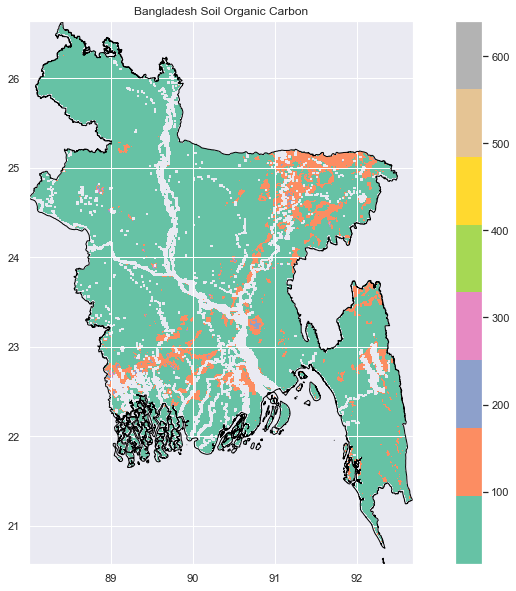

In [64]:
ban_gsoc_rst = r'gsoc_masked.tiff'
ban_gsoc_img = rst.open(ban_gsoc_rst)
mplb.rc('image', cmap='Set2')
arr = forest_gsoc_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.set_title('Bangladesh Soil Organic Carbon')
show(arr, transform=ban_gsoc_img.transform, ax=ax)
bangladesh.plot(ax=ax, color='none', edgecolor='black')

fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)

plt.show()

## Observation: 
- Overall Soil Organic Carbon in the country ranges between 0-100 for 95% of the area.
- SOC ranging between 100-200 can be found in small amount that are spread out across central and relatively higher towards the North Eastern region (the region where Acrisol is generally found).

### Soil Organic Carbon Density (1m Depth)

In [8]:
carbon_dens_rst = 'GlobalSoilOrganicCarbonDensityinkgCm_1mDepth.tif'
carbon_dens_img = rst.open(carbon_dens_rst)

In [9]:
out_carbon_dens, out_transform = mask(carbon_dens_img, [geom for geom in bangladesh.geometry], crop=True, pad=True)
out_meta = carbon_dens_img.meta

out_meta.update({"driver": "GTiff",
                 "height": out_carbon_dens.shape[1],
                 "width": out_carbon_dens.shape[2],
                 "transform": out_transform})

with rst.open(r'carbon_dens_masked.tiff', 'w', **out_meta) as dest:
    dest.write(out_carbon_dens)

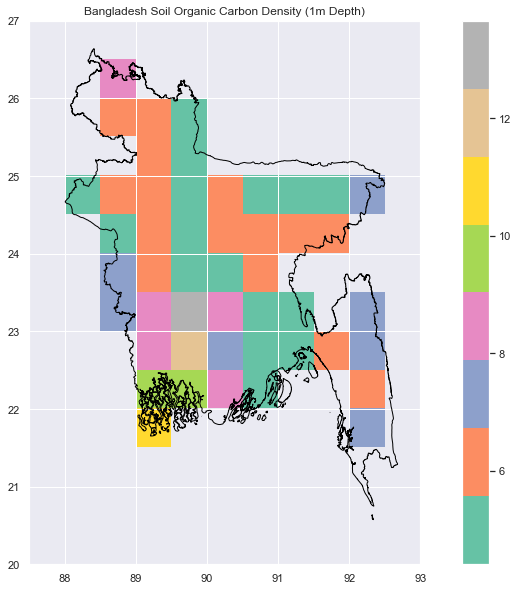

In [13]:
ban_carbon_dens_rst = r'carbon_dens_masked.tiff'
ban_carbon_dens_img = rst.open(ban_carbon_dens_rst)
mplb.rc('image', cmap='Set2')

arr = ban_carbon_dens_img.read(1)
arr = np.where(arr < -10, np.nan, arr)
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.set_title('Bangladesh Soil Organic Carbon Density (1m Depth)')
show(arr, transform=ban_carbon_dens_img.transform, ax=ax)
bangladesh.plot(ax=ax, color='none', edgecolor='black')

fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)

plt.show()

## Observation: 
- The Soil Organic Carbon Density at 1m Depth ranges between 0-8 for most of the areas across Northern & Central Bangladesh.
- Relatively higher SOC Density can be spotted Southern areas, namely in Sundarban Mangroves & Freshwater Swamp Forests (ranges 8-12).